In [106]:
import pandas as pd 
import numpy as np

In [107]:
df = pd.read_csv('larger.csv')

In [108]:
print(df)

      outlook  temp  humidity  wind  play
0           1     0         1     1     1
1           1     2         0     1     1
2           2     0         1     1     1
3           1     0         1     1     1
4           1     2         0     0     0
...       ...   ...       ...   ...   ...
1395        2     1         0     0     0
1396        2     2         0     1     0
1397        1     0         1     1     1
1398        1     2         0     0     0
1399        2     2         1     0     1

[1400 rows x 5 columns]


In [109]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# # Encode categorical columns (features and target)
# df['outlook'] = encoder.fit_transform(df['outlook'])
# df['temp'] = encoder.fit_transform(df['temp'])
# df['humidity'] = encoder.fit_transform(df['humidity'])
# df['wind'] = encoder.fit_transform(df['wind'])
# df['play'] = encoder.fit_transform(df['play'])


In [110]:
X = df.drop('play', axis=1)
y = df['play']

In [111]:
print(df)



      outlook  temp  humidity  wind  play
0           1     0         1     1     1
1           1     2         0     1     1
2           2     0         1     1     1
3           1     0         1     1     1
4           1     2         0     0     0
...       ...   ...       ...   ...   ...
1395        2     1         0     0     0
1396        2     2         0     1     0
1397        1     0         1     1     1
1398        1     2         0     0     0
1399        2     2         1     0     1

[1400 rows x 5 columns]


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [114]:
y_pred = model.predict(X_test)

Performance of Model

In [115]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.21%


In [116]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 81  19]
 [  0 180]]


In [117]:
from sklearn.metrics import precision_score

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 0.90


In [118]:
from sklearn.metrics import recall_score

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 1.00


In [119]:
from sklearn.metrics import f1_score

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.95


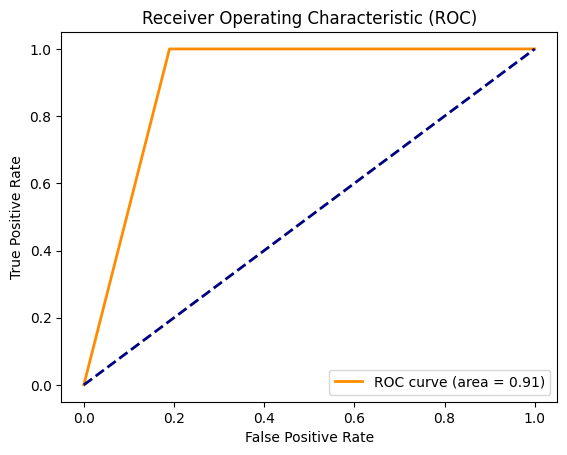

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [121]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       100
           1       0.90      1.00      0.95       180

    accuracy                           0.93       280
   macro avg       0.95      0.91      0.92       280
weighted avg       0.94      0.93      0.93       280



Now solving numerical questions

like predict when outlook = sunny , temp = cool , humidity , high , wind = strong

Encoding 
Outlook 
sunny - 2
Overcast - 0
Rainy - 1
Temp
Hot - 1
Mild - 2
Cold - 0
Humidity
High - 0
Normal - 1 
Wind
Weak - 1
Strong - 0


In [122]:
print("When outlook = sunny , temp = cool , humidity , high , wind = strong the likeness to play is -> " , model.predict([[2,0,0,0]]))

When outlook = sunny , temp = cool , humidity , high , wind = strong the likeness to play is ->  [0]


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
